In [64]:
from matplotlib import font_manager
f_path = '/Library/Fonts/Arial Unicode.ttf'
font_manager.FontProperties(fname=f_path).get_name()

'Arial Unicode MS'

In [65]:
from matplotlib import rc
rc('font', family = 'Arial Unicode MS')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from glob import glob
import pandas as pd

#헬스관련 자료를 합침

dfs=[]
file_list = glob('./EDA_data/1. health/*.csv')
for each_file in file_list:
    df = pd.read_csv(each_file)
    dfs.append(df)
    
df = pd.concat(dfs)

In [14]:
#2017년도 자료를 뽑음

df = df[df['TIME'] == 2017]
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
57,AUS,ALCOHOL,TOT,LT_CAP15,A,2017,9.5,NaN
115,AUT,ALCOHOL,TOT,LT_CAP15,A,2017,12.1,NaN
171,BEL,ALCOHOL,TOT,LT_CAP15,A,2017,9.4,NaN
230,CAN,ALCOHOL,TOT,LT_CAP15,A,2017,8.2,NaN
269,CZE,ALCOHOL,TOT,LT_CAP15,A,2017,11.6,D


In [108]:
#SUBJECT의 평균을 구해줌

df = pd.DataFrame(df.groupby(['LOCATION', 'INDICATOR']).mean())
df.reset_index(inplace=True)
df

,LOCATION,INDICATOR,TIME,Value
0,AFG,POLLUTIONEXP,2017,78.984295
1,AGO,POLLUTIONEXP,2017,66.254160
2,ALB,POLLUTIONEXP,2017,58.818040
3,ARE,POLLUTIONEXP,2017,70.042080
4,ARG,POLLUTIONEXP,2017,55.119270
...,...,...,...,...
351,ZAF,INFANTMORTALITY,2017,29.600000
352,ZAF,LIFEEXP,2017,63.633333
353,ZAF,POLLUTIONEXP,2017,62.459445
354,ZMB,POLLUTIONEXP,2017,63.872210


In [21]:


# 미국만 뽑아 봄
df_usa = df[df["LOCATION"] == 'USA']
df_usa

,LOCATION,INDICATOR,TIME,Value
339,USA,ALCOHOL,2017,8.90000
340,USA,INFANTMORTALITY,2017,5.80000
341,USA,LIFEEXP,2017,78.60000
342,USA,MEDICALDOC,2017,2.61000
343,USA,POLLUTIONEXP,2017,5.25571
344,USA,SMOKERS,2017,10.50000


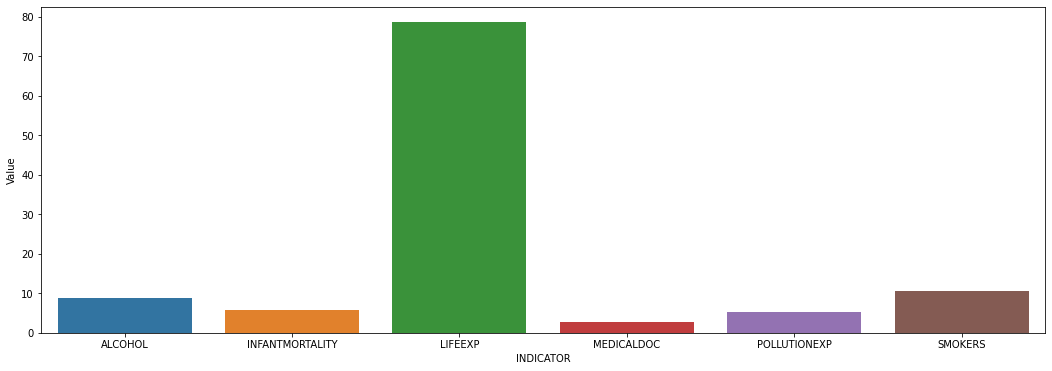

In [27]:
#미국 헬스관련 영역을 그래프로 그려 봄
plt.figure(figsize=(18,6))
sns.barplot(x= 'INDICATOR', y='Value', data = df_usa)


In [29]:
df.head()

,LOCATION,INDICATOR,TIME,Value
0,AFG,POLLUTIONEXP,2017,78.984295
1,AGO,POLLUTIONEXP,2017,66.254160
2,ALB,POLLUTIONEXP,2017,58.818040
3,ARE,POLLUTIONEXP,2017,70.042080
4,ARG,POLLUTIONEXP,2017,55.119270


In [38]:

#알콜 소비량을 뽑아 봄
df_alcohol= df[df["INDICATOR"] =='ALCOHOL']
df_alcohol = df_alcohol.sort_values(by ='Value', ascending = False)

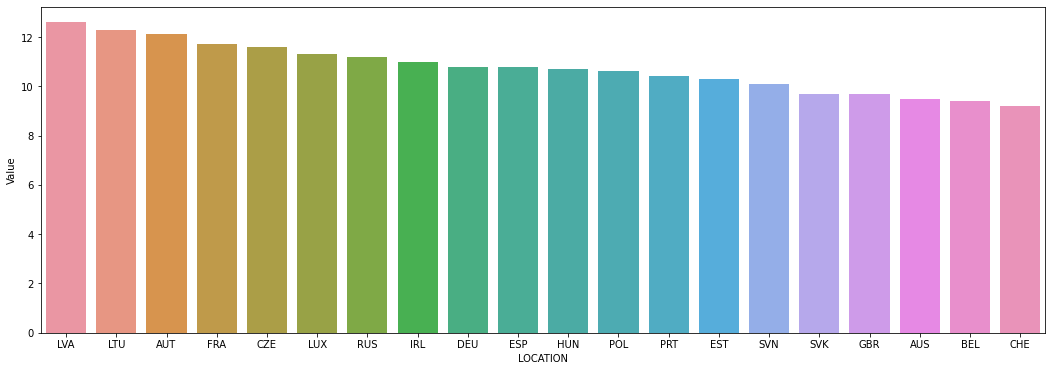

In [42]:
plt.figure(figsize=(18,6))
sns.barplot(x= 'LOCATION', y='Value', data = df_alcohol[:20])

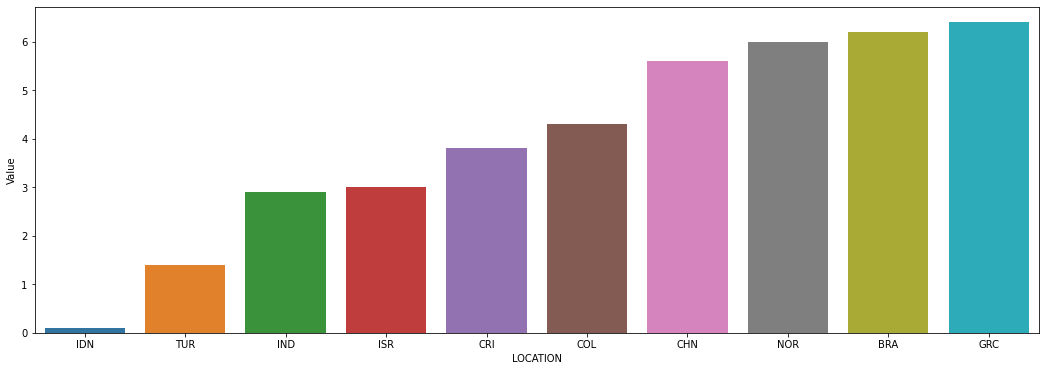

In [45]:
#알콜소비량을 반대로 뽑아봄

plt.figure(figsize=(18,6))
sns.barplot(x= 'LOCATION', y='Value', data = df_alcohol[::-1][:10])

In [47]:
# 유아사망율을 뽑아 봄

df_infant= df[df["INDICATOR"] =='INFANTMORTALITY']
df_infant = df_alcohol.sort_values(by ='Value', ascending = False)

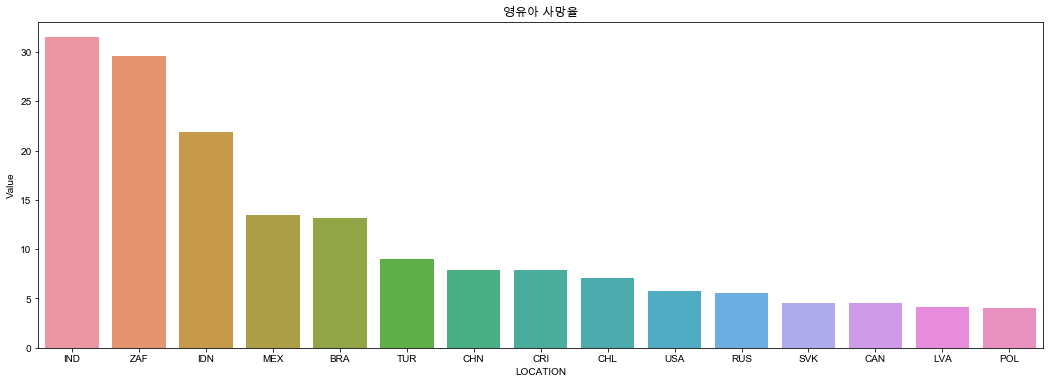

In [67]:
plt.figure(figsize=(18,6))
sns.barplot(x= 'LOCATION', y='Value', data = df_alcohol[:15])
plt.title("영유아 사망율");

#인도네시아의 유아사망율이 가장 높음

In [125]:
# 더 깊숙히 들어가 보고자 인도네시아의 헬스관련 자료를 탐색함
df_ind = df[df["LOCATION"] == 'IND']
df_ind.reset_index(drop=True, inplace = True)

In [127]:
df_ind['Value'][0]

2.9

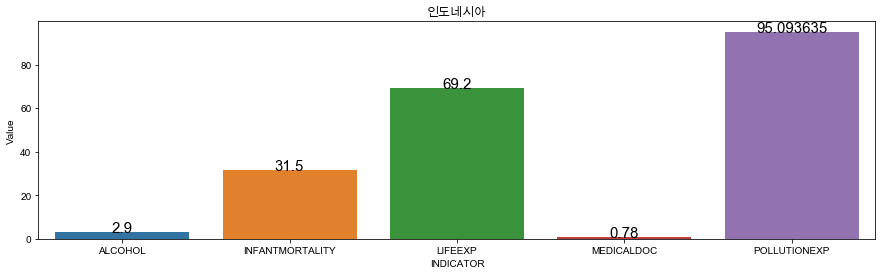

In [138]:
plt.figure(figsize=(15,4))
ind = sns.barplot(x= 'INDICATOR', y='Value', data = df_ind)
for i in range(df_ind.shape[0]):
    ind.text(x=i, y = df_ind['Value'][i], s=df_ind['Value'][i],fontsize=15, horizontalalignment='center')
plt.title("인도네시아");

#알콜소비량은 적음(종교)
# 기대수명과 1000명당 의사수 공기오염도는 다른 나라와 비교해보자!

In [142]:
#오염 노출정도

df_pol= df[df["INDICATOR"] =='POLLUTIONEXP']
df_pol = df_pol.sort_values(by ='Value', ascending = False)

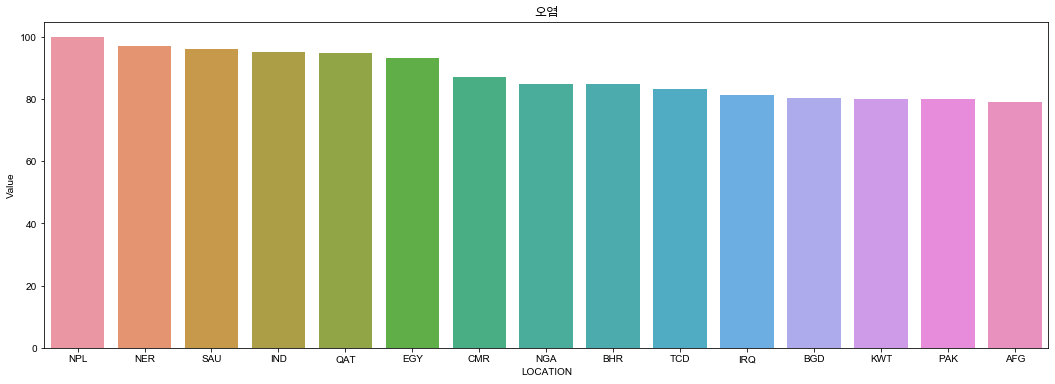

In [141]:
plt.figure(figsize=(18,6))
sns.barplot(x= 'LOCATION', y='Value', data = df_pol[:15])
plt.title("오염");
#인도네시아가 4위

In [77]:
#1000명당 의사수

df_doc= df[df["INDICATOR"] =='MEDICALDOC']
df_doc = df_doc.sort_values(by ='Value', ascending = False)

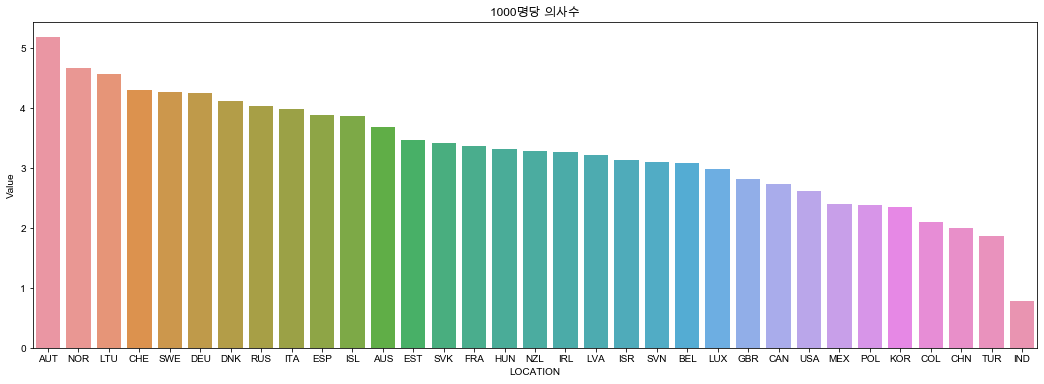

In [78]:

plt.figure(figsize=(18,6))
sns.barplot(x= 'LOCATION', y='Value', data = df_doc)
plt.title("1000명당 의사수");
#인도네시아가 꼴찌

In [102]:
# 기대수명을 뽑아봄
df_life= df[df["INDICATOR"] =='LIFEEXP']
df_life = df_life.sort_values(by ='Value', ascending = False)

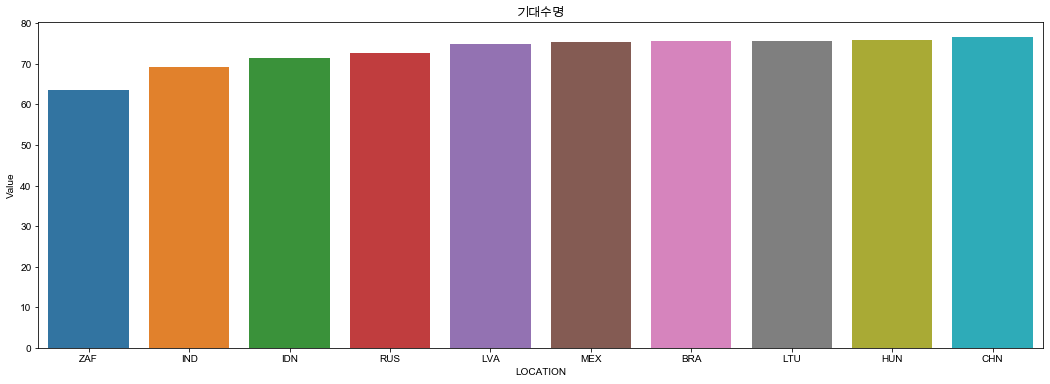

In [104]:
plt.figure(figsize=(18,6))
sns.barplot(x= 'LOCATION', y='Value', data = df_life[::-1][:10])
plt.title("기대수명");

# 뒤에서 두번째

In [106]:
df_ind_pivot = df_ind[["LOCATION","INDICATOR", "Value"]].pivot(index = "INDICATOR", columns = 'INDICATOR', values = 'Value')

ValueError: The name INDICATOR occurs multiple times, use a level number

In [100]:
df_ind_pivot

LOCATION,IND
INDICATOR,
ALCOHOL,2.900000
INFANTMORTALITY,31.500000
LIFEEXP,69.200000
MEDICALDOC,0.780000
POLLUTIONEXP,95.093635
